In [1]:
#| default_exp app

## Dogs vs Cats

In [2]:
#| export

import warnings
warnings.filterwarnings('ignore')

from fastai.vision.all import*
import gradio as gr
def is_cat(x): return x[0].isupper()

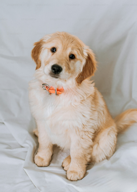

In [3]:
#| export

im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im

In [4]:
#| export
learn = load_learner('model.pkl')

In [5]:
#| export
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 4.4267e-08]))

In [6]:
#| export
from fastai.vision.all import *
import gradio as gr

learn = load_learner('model.pkl')

def classify_image(img):
    pred, _, probs = learn.predict(img)
    original_classes = learn.dls.vocab 

    class_map = {False: "Dog", True: "Cat"}

    probs_dict = {class_map[c]: float(probs[i]) for i, c in enumerate(original_classes)}

    return probs_dict  

image_input = gr.Image(type="pil")
label_output = gr.Label(num_top_classes=None)  # shows all classes as bars

examples = ['dog.jpeg', 'cat.jpg']


intf = gr.Interface(
    fn=classify_image,
    inputs=image_input,
    outputs=label_output,
    examples=examples
)

intf.launch(inline=False)



* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [7]:
#| export
m = learn.model

## Exporting the notebook

In [11]:
from nbdev.export import notebook2script

In [12]:
notebook2script('app.ipynb')

Converted app.ipynb.
